## **Ejercicio de Regresión 1 (Core)**


### **Objetivo:**

Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

### **Descripción del problema:**

Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. 

Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). 

Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

### **Instrucciones:**

- **Carga de datos:** Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
    - **SqFt:** Tamaño de la casa en pies cuadrados.
    - **Bedrooms:** Número de habitaciones.
    - **Bathrooms:** Número de baños.
    - **price:** Precio de venta de la casa.

- **Exploración de datos:** Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

- **Preparación de datos:** Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

- **Entrenamiento del modelo:** Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.

- **Evaluación del modelo:** Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

- **Predicción:** Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
    - **Tamaño:** 2000 pies cuadrados
    - **Habitaciones:** 3
    - **Baños:** 2


In [7]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv(r'C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\house-prices.csv')

# Mostrar las primeras 10 filas
print("Primeras 10 filas del DataFrame:")
print(df.head(10))

# Contar valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isna().sum())

# Descripción estadística del DataFrame
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe())


Primeras 10 filas del DataFrame:
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East
5     6  114600  1780         3          2       2    No        North
6     7  151600  1830         3          3       3   Yes         West
7     8  150700  2160         4          2       2    No         West
8     9  119200  2110         4          2       3    No         East
9    10  104000  1730         3          3       3    No         East

Cantidad de valores nulos por columna:
Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Paso 1: Exploración de datos
# Seleccionar columnas relevantes para el análisis
features = data[['SqFt', 'Bedrooms', 'Bathrooms']]
target = data['Price']

# Paso 2: Separar data en subconjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Paso 3: Entrenamiento del Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener coeficientes e Interceptar
coefficients = model.coef_
intercept = model.intercept_

# Paso 4: Evaluación del Modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Paso 5: Predicción
new_house = pd.DataFrame({
    'SqFt': [2000],
    'Bedrooms': [3],
    'Bathrooms': [2]
})
predicted_price = model.predict(new_house)

# Output
print("Resultados del Modelo de Regresión Lineal:\n")

for key, value in results.items():
    if isinstance(value, list):
        print(f"{key}:")
        for i, val in enumerate(value, start=1):
            print(f"  {i}. {val:.2f}")
    elif isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")


Resultados del Modelo de Regresión Lineal:

Coefficients:
  1. 41.45
  2. 10278.01
  3. 13090.39
Intercept: -16372.92
MSE: 320149938.23
R^2: 0.46
Predicted Price for New House: 123537.00


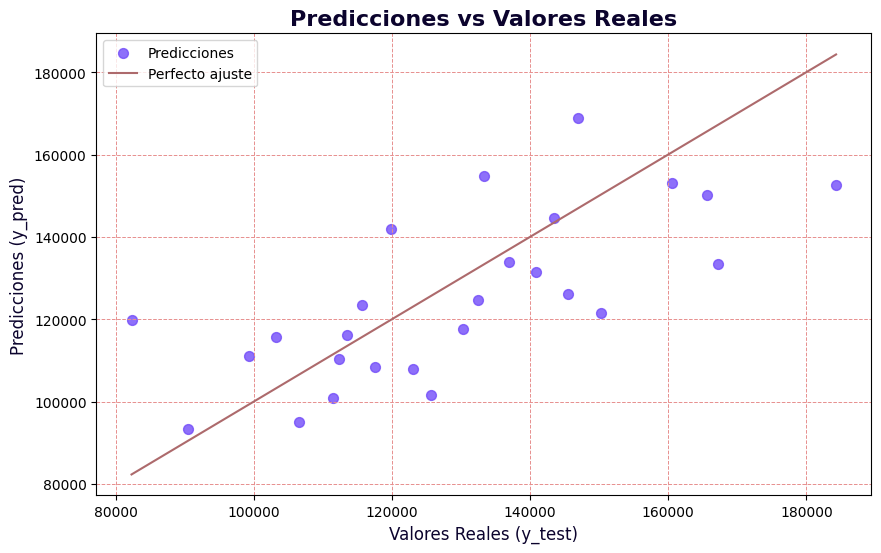

In [33]:
# Gráfico de dispersion de las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#724cf9', alpha=0.8, s=50, label='Predicciones', marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#ad6a6c', linewidth=1.5, label='Perfecto ajuste') 

# Personalizar etiquetas, título y diseño
plt.title("Predicciones vs Valores Reales", fontsize=16, fontweight='bold', color='#0b032d')
plt.xlabel("Valores Reales (y_test)", fontsize=12, color='#0b032d')
plt.ylabel("Predicciones (y_pred)", fontsize=12, color='#0b032d') 
plt.legend()
plt.grid(color='#e78f8e', linestyle='--', linewidth=0.7) 

# Mostrar el gráfico
plt.show()